### 环境安装

In [1]:
!pip install gym==0.26.2
!pip install pygame==2.3.0

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple
Looking in indexes: http://mirrors.tencentyun.com/pypi/simple


In [2]:
# 导入gym库
import gym

# 创建CartPole环境，指定渲染模式为rgb_array，如果是在IDE中可以改为'human'
env = gym.make('CartPole-v1', render_mode='rgb_array')
# 重置环境
env.reset()

# 循环N次
for i in range(10):
    env.render() # 渲染环境
    action = env.action_space.sample() # 从动作空间中随机选取一个动作
    env.step(action) # 执行动作

# 关闭环境
env.close()

### 工具类

In [3]:
# 在jupyter notebook里env.render看不到窗口
# 写一个helper类，用matplotlib刷新显示图像
# 初始化传入env，调用helper的render即可
from IPython import display # 导入display模块，用于在Jupyter Notebook中显示图像
import matplotlib
import matplotlib.pyplot as plt # 导入matplotlib库，用于绘制图像
%matplotlib inline

class GymHelper:
    def __init__(self, env, figsize = (3, 3)):
        self.env = env # 初始化Gym环境
        self.figsize = figsize # 初始化绘图窗口大小
        
        plt.figure(figsize = figsize) # 创建绘图窗口
        self.img = plt.imshow(env.render()) # 在绘图窗口中显示初始图像
    
    def render(self, title = None):
        image_data = self.env.render() # 获取当前环境图像渲染数据
        
        self.img.set_data(image_data) # 更新绘图窗口中的图像数据
        display.display(plt.gcf()) # 刷新显示
        display.clear_output(wait = True) # 有新图片时再清除绘图窗口原有图像
        if title: # 如果有标题，就显示标题
            plt.title(title)

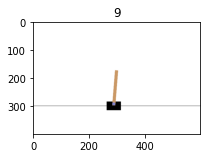

In [4]:
# 导入gym库
import gym

# 创建CartPole环境，指定渲染模式为rgb_array，如果是在IDE中可以改为'human'
env = gym.make('CartPole-v1', render_mode='rgb_array')
# 重置环境
env.reset()
# 创建GymHelper
gym_helper = GymHelper(env)

# 循环N次
for i in range(10):
    gym_helper.render(title = str(i)) # 渲染环境
    action = env.action_space.sample() # 从动作空间中随机选取一个动作
    env.step(action) # 执行动作

# 关闭环境
env.close()